<a href="https://colab.research.google.com/github/Temmy-bit/Advance-Pytorch/blob/main/Pytorch_vision_for_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")

else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True,exist_ok=True)


with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)


with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak and sushi data...


In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [ ]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}...")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi...
There are 3 directories and 0 images in data/pizza_steak_sushi/train...
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak...
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza...
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi...
There are 3 directories and 0 images in data/pizza_steak_sushi/test...
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak...
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza...
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi...


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/sushi/1680893.jpg
sushi
Random image path: data/pizza_steak_sushi/test/sushi/1680893.jpg
Image class name: sushi
Image height: 512
Image width: 512


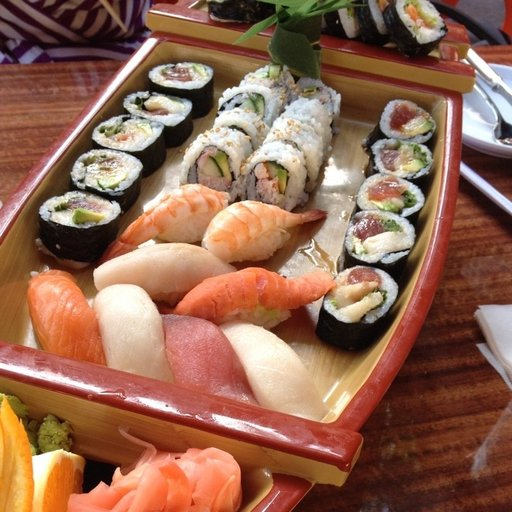

In [ ]:
import random
from PIL import Image

# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

# image_path_list
random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f'Image class name: {image_class}')
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

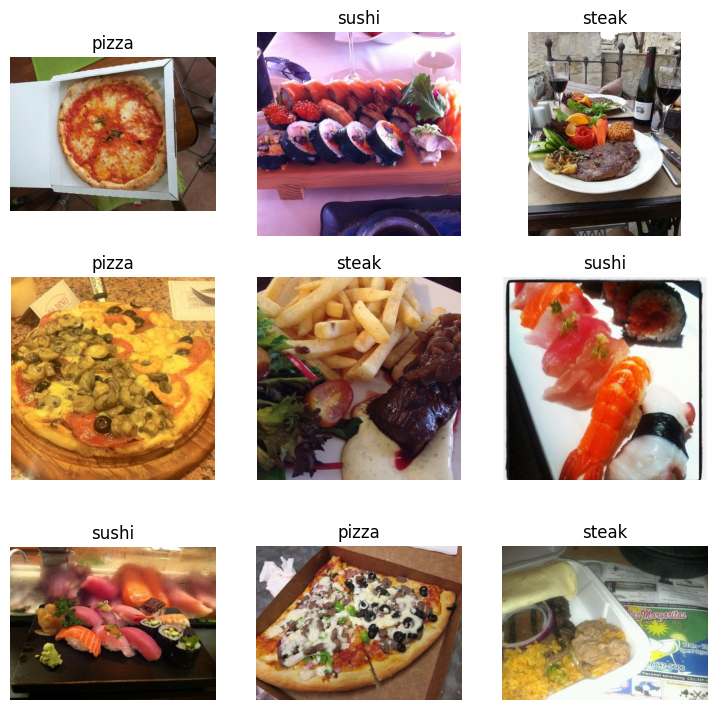

In [ ]:
fig = plt.figure(figsize=(9,9))
rows,cols = 3,3
for i in range(1,rows*cols+1):
    random_image_path = random.choice(image_path_list)
    # print(random_image_path)

    image_class = random_image_path.parent.stem
    # print(image_class)

    img = Image.open(random_image_path)

    fig.add_subplot(rows,cols,i)
    plt.imshow(np.asarray(img))
    plt.title(image_class)
    plt.axis(False);

### Data Transformation

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
img = data_transform(img)

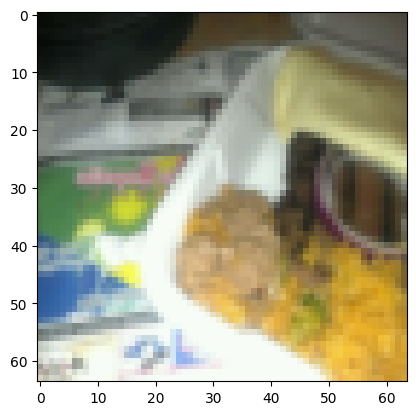

In [ ]:
plt.imshow(img.permute(1,2,0))

In [ ]:
img.shape

torch.Size([3, 64, 64])

In [ ]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
    """
     Select random images from a path of images and loads/transforms
     them then plots the original vs the transformed version...
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths,k=n)
    # image_class = random_image_paths.parent.stem
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot tarhet image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False);

            fig.suptitle(f"Class: {image_path.parent.stem}",fontsize = 16)

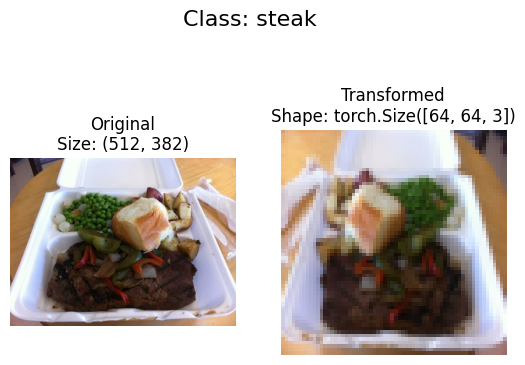

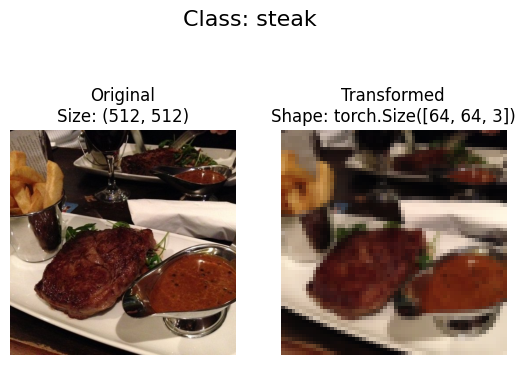

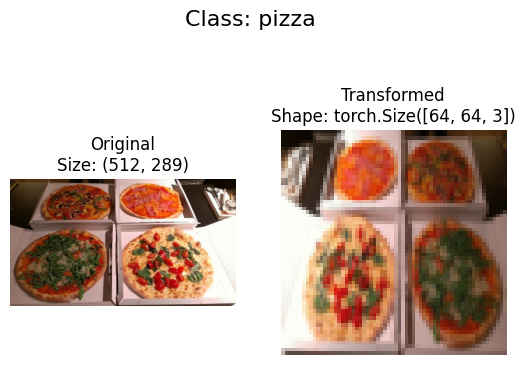

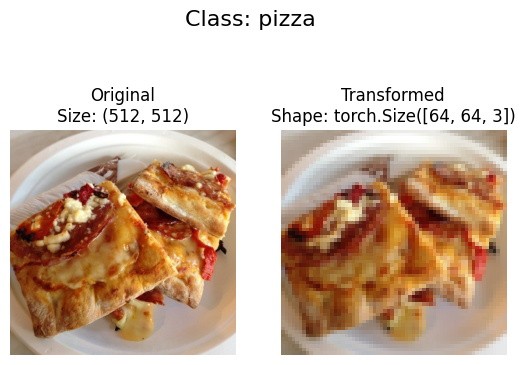

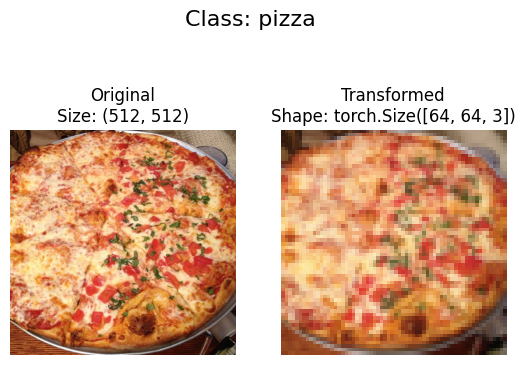

In [ ]:
plot_transformed_images(image_path_list,data_transform,n=5,seed=42)

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                transform=test_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data),len(test_data)

(225, 75)

In [ ]:
img,label = train_data[0][0],train_data[0][1]

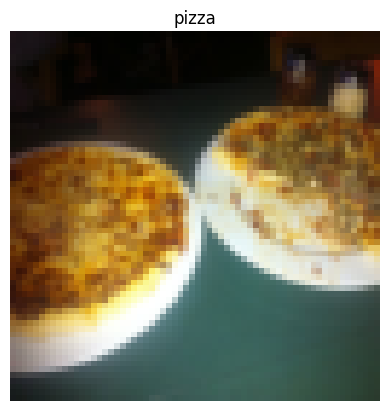

In [ ]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis("off");

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle =True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bf15c867af0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf251b3d420>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(8, 3)

Image shape: torch.Size([32, 3, 64, 64])
Label shape torch.Size([32])


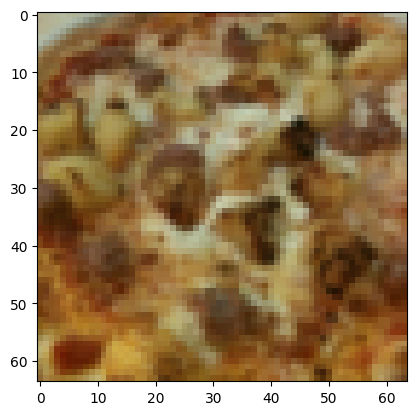

In [ ]:
img, label = next(iter(train_dataloader))
plt.imshow((img[0]).permute(1,2,0))
print(f"Image shape: {img.shape}")
print(f"Label shape {label.shape}")

In [ ]:
from typing import Tuple, Dict, List

In [ ]:
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
from torch import nn

In [ ]:
class FoodVision01(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1 ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                     out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        # print(f"Output shape for the first conv block {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output of the second conv block {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape for the classfier conv block {x.shape}")
        return x

In [ ]:
img.shape

torch.Size([32, 3, 64, 64])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
torch.manual_seed(42)
model_1=FoodVision01(input_shape  = 3,
                    hidden_units = 10,
                    output_shape = len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr=0.001)

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
from tqdm.auto import tqdm
# from torchmetrics import Accuracy

torch.manual_seed(42)
# train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_loss = 0
#     Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_1.train()

        y_pred = model_1(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # if batch % 400 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)

#     Testing
    test_loss, test_acc = 0,0
    model_1.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_1(X_test)

            test_loss += loss_fn(test_pred,y_test)

            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

            test_loss /= len(test_dataloader)

            test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc :.4f}")
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
#                                            end = train_time_end_on_cpu,
#                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----

Train loss: 1.1075 | Test loss: 0.5396, Test acc: 2.8935
Epoch: 1
-----

Train loss: 1.0786 | Test loss: 0.5822, Test acc: 2.8935
Epoch: 2
-----

Train loss: 1.0805 | Test loss: 0.6151, Test acc: 2.8935
Epoch: 3
-----

Train loss: 1.1281 | Test loss: 0.6030, Test acc: 2.8935
Epoch: 4
-----

Train loss: 1.0893 | Test loss: 0.5822, Test acc: 2.8935


In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_acc = 0
    for batch, (X,y) in enumerate(train_dataloader):

        model_1.train()
        y_pred = model_1(X)

        loss=loss_fn(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss /= len(train_dataloader)
        acc  = accuracy_fn(y,y_pred.argmax(dim=1))
        train_acc += acc

        model_1.eval()
        test_ac = 0
        with torch.inference_mode():
            for X_test,y_test in test_dataloader:
                test_pred = model_1(X_test)
                test_loss = loss_fn(test_pred,y_test)
                test_acc = accuracy_fn(y_test,test_pred.argmax(dim=1))
                test_ac += test_acc

            test_ac /= len(test_dataloader)
        train_acc /= len(train_dataloader)

    print(f"Train accuracy {train_acc:.4f}| Train loss {loss:.4f}| Test accuracy {test_ac:.4f}| Test Loss {test_loss:.4f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Train accuracy 13.2188| Train loss 0.1263| Test accuracy 26.0417| Test Loss 1.2310
Epoch: 1
-----
Train accuracy 0.5203| Train loss 0.1368| Test accuracy 25.0000| Test Loss 1.2257
Epoch: 2
-----
Train accuracy 0.7337| Train loss 0.1356| Test accuracy 19.7917| Test Loss 1.1520
Epoch: 3
-----
Train accuracy 13.2771| Train loss 0.1290| Test accuracy 51.5152| Test Loss 1.0741
Epoch: 4
-----
Train accuracy 0.9473| Train loss 0.1474| Test accuracy 53.5038| Test Loss 1.0285


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device="cpu"):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device),y.to(device)
#             Make Predictions
            y_pred = model(X).to(device)

#            Accumulate the loss and acc valus per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred = y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}

#   Calculate model result on the test dataset
model_1_results = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                             device = "cpu")
model_1_results

  0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'FoodVision01',
 'model_loss': 1.052587628364563,
 'model_acc': 53.503787878787875}

In [ ]:
# Training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for batch_data in dataloader:
        # Forward pass, backward pass, and optimization steps here
        # ...

    # Validation step
    # val_loss = ...

    # Check for improvement in validation loss
    if val_loss < best_val_loss:
        # Save the current best model
        torch.save(vit_model.state_dict(), 'best_model_vit.pth')
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1

    # Check for early stopping
    if counter >= patience:
        print(f'Early stopping after {epoch} epochs.')
        break

# Load the best model
vit_model.load_state_dict(torch.load('best_model_vit.pth'))


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
            accuracy_fn,
              device: torch.device = device
              ):

    """"Performs a training with model trying to learn on data_loader."""

    model.train()
    # for epoch in tqdm(range(epochs)):
    #     print(f"Epoch: {epoch}\n-----")

    train_loss,train_acc = 0,0
    #     Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y,y_pred.argmax(dim = 1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # if batch % 400 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.3f}")


def test_step(model: torch.nn.Module,
             accuracy_fn,
             loss_fn: torch.nn.Module,
             dataloader: torch.utils.data.dataloader,
             device: torch.device = device):
    """Performs a testing loop step on model going over dataloader"""
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in dataloader:
            X_test,y_test =  X_test.to(device),y_test.to(device)

            test_pred = model(X_test)

            test_loss += loss_fn(test_pred,y_test)

            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))

        test_loss /= len(dataloader)

        test_acc /= len(dataloader)

        print(f"Test Loss: {test_loss:.5f} | Test Accuracy {test_acc:.3f}\n")

from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
torch.manual_seed(42)
model_on_gpu=FoodVision01(input_shape  = 3,
                    hidden_units = 10,
                    output_shape = len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_on_gpu.parameters(),lr=0.001)

In [ ]:
# from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model_on_gpu,train_dataloader,loss_fn,optimizer,accuracy_fn,device)

    test_step(model = model_on_gpu,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
    train_time_end_on_gpu = timer()
    total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                           end = train_time_end_on_gpu,
                                           device = str(next(model_on_gpu.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.10758 | Train Accuracy: 26.953
Test Loss: 1.13789 | Test Accuracy 26.042

Train time on cuda:0: 1.099 seconds
Epoch: 1
-----
Train Loss: 1.08283 | Train Accuracy: 42.578
Test Loss: 1.16801 | Test Accuracy 19.792

Train time on cuda:0: 2.147 seconds
Epoch: 2
-----
Train Loss: 1.12032 | Train Accuracy: 29.297
Test Loss: 1.17264 | Test Accuracy 19.792

Train time on cuda:0: 3.205 seconds
Epoch: 3
-----
Train Loss: 1.09480 | Train Accuracy: 41.406
Test Loss: 1.14131 | Test Accuracy 19.792

Train time on cuda:0: 4.252 seconds
Epoch: 4
-----
Train Loss: 1.09457 | Train Accuracy: 29.297
Test Loss: 1.14009 | Test Accuracy 19.792

Train time on cuda:0: 5.316 seconds


In [ ]:
test_dataloader

In [ ]:
device

'cuda'

In [ ]:
model_on_gpu_results = eval_model(model = model_on_gpu,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device=device)
model_on_gpu_results

  0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'FoodVision01',
 'model_loss': 1.1400887966156006,
 'model_acc': 19.791666666666668}

In [ ]:
def make_predictions(model: torch.nn.Module,
                    data:list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction Probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get prob_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([3, 64, 64])

In [ ]:
pred_probs = make_predictions(model=model_1,
                             data = test_samples)

pred_probs[:2]

tensor([[0.2370, 0.2102, 0.5528],
        [0.2436, 0.3575, 0.3989]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 2, 0, 1, 2, 2, 2, 2])

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_1.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        X,y = X.to(device),y.to(device)

        y_logits = model_1(X)

        y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/3 [00:00<?, ?it/s]

tensor([2, 0, 0, 2, 2, 0, 2, 0, 0, 0])

In [ ]:
y_pred = y_pred_tensor.unsqueeze(dim=1).numpy()
y_pred.reshape(-1)
# y_pred.shape
test_data = torch.Tensor(test_data.targets)
test_data[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
pip install -q torchmetrics

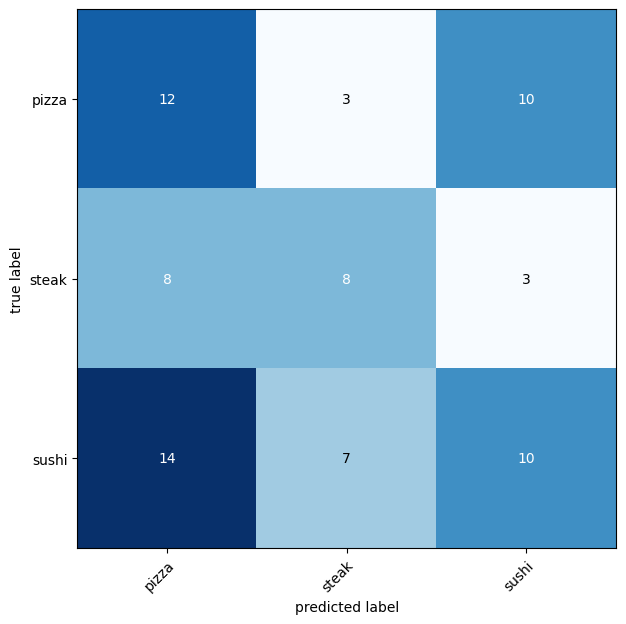

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cofmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
cofmat_tensor = cofmat(preds=y_pred_tensor,
                      target=test_data)

fig,ax = plot_confusion_matrix(conf_mat=cofmat_tensor.numpy(),
                              class_names=class_names,
                              figsize=(10,7))

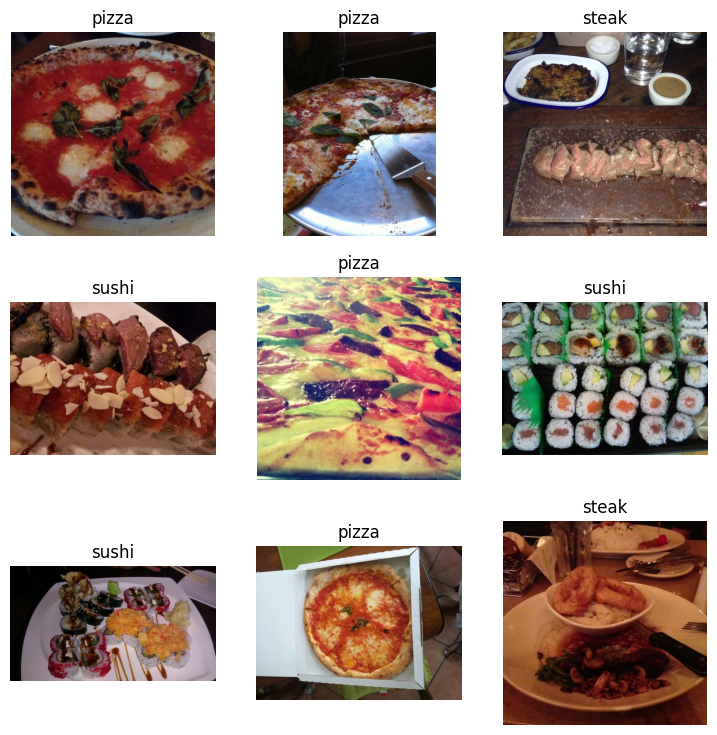

In [ ]:
fig = plt.figure(figsize=(9,9))
rows,cols = 3,3
for i in range(1,rows*cols+1):
    random_image_path = random.choice(image_path_list)
    # print(random_image_path)

    image_class = random_image_path.parent.stem
    # print(image_class)

    img = Image.open(random_image_path)

    fig.add_subplot(rows,cols,i)
    plt.imshow(np.asarray(img))
    plt.title(image_class)
    plt.axis(False);

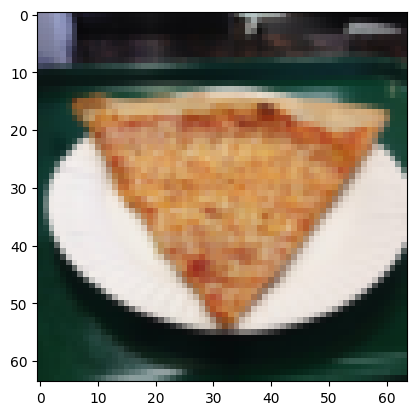

In [ ]:
test_samples[0].shape
plt.imshow(test_samples[0].permute(1,2,0))

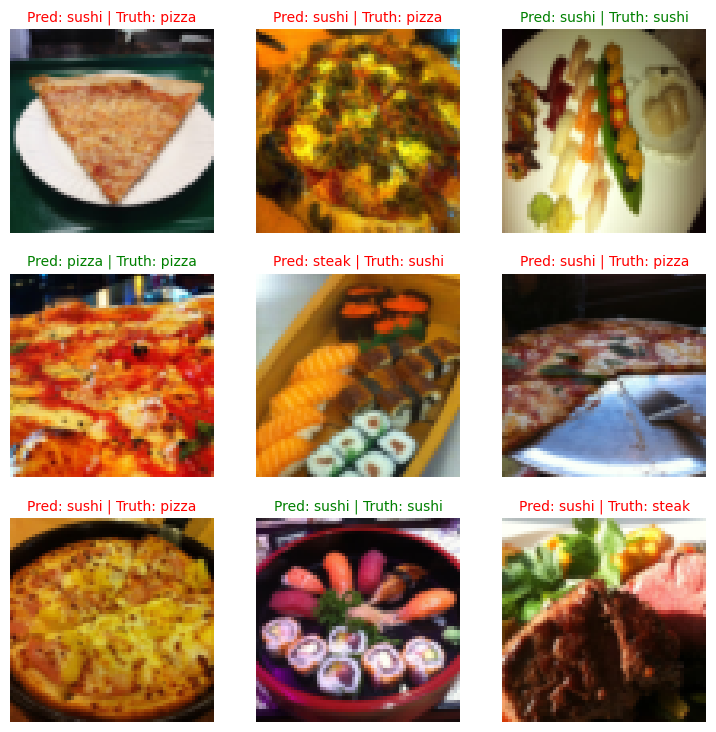

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)

    # img = Image.open(sample)
    # img = cv2.imread(sample,"Image")


    plt.imshow((sample.squeeze()).permute(1,2,0))

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize = 10,c="g")

    else:
        plt.title(title_text,fontsize=10,c="r")

    plt.axis(False);

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

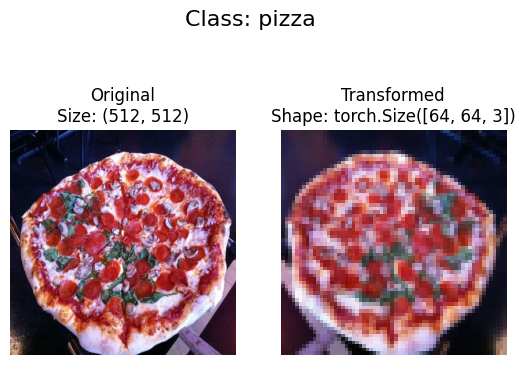

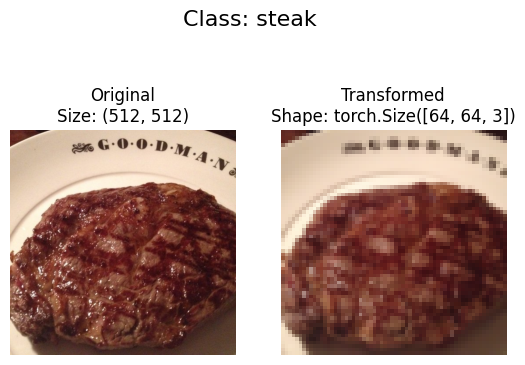

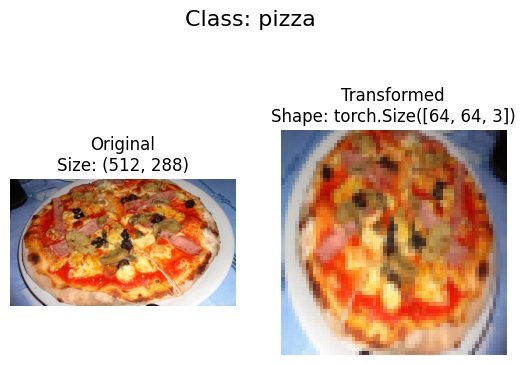

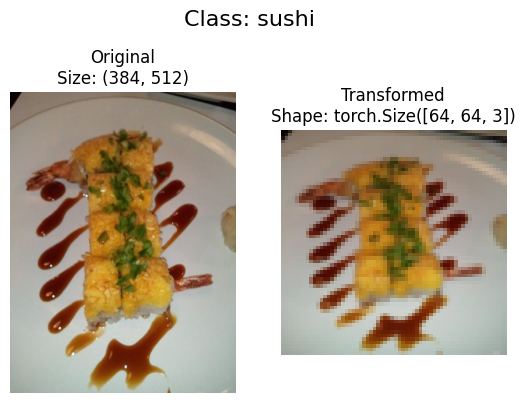

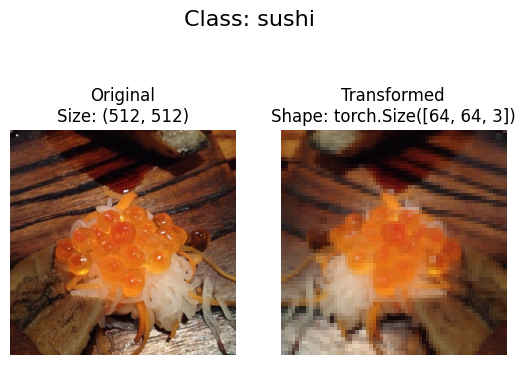

In [ ]:
plot_transformed_images(image_path_list,data_transform,n=5)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                 transform=train_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                transform=test_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle =True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bf251f67850>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf251f66890>)

In [ ]:
class FoodVision02(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1 ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,
                     out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        # print(f"Output shape for the first conv block {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output of the second conv block {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape for the classfier conv block {x.shape}")
        return x

model_2 = FoodVision02(3,10,len(class_names)).to(device)
optimizer = torch.optim.SGD(params = model_2.parameters(),lr=0.1)

In [ ]:
# from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs = 9
start_time = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_step(model=model_2,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
    test_step(model=model_2,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

    end_time = timer()
    print_train_time(start_time,end_time,device)

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.11396 | Train Accuracy: 29.297
Test Loss: 1.11214 | Test Accuracy 19.792

Train time on cuda: 1.794 seconds
Epoch: 1
-----
Train Loss: 1.10280 | Train Accuracy: 28.125
Test Loss: 1.02752 | Test Accuracy 54.167

Train time on cuda: 3.554 seconds
Epoch: 2
-----
Train Loss: 1.11848 | Train Accuracy: 27.734
Test Loss: 1.11118 | Test Accuracy 19.792

Train time on cuda: 5.337 seconds
Epoch: 3
-----
Train Loss: 1.09847 | Train Accuracy: 29.688
Test Loss: 0.97533 | Test Accuracy 54.167

Train time on cuda: 7.850 seconds
Epoch: 4
-----
Train Loss: 1.11517 | Train Accuracy: 26.953
Test Loss: 1.07912 | Test Accuracy 54.167

Train time on cuda: 20.037 seconds
Epoch: 5
-----
Train Loss: 1.10328 | Train Accuracy: 28.125
Test Loss: 1.09931 | Test Accuracy 19.792

Train time on cuda: 21.840 seconds
Epoch: 6
-----
Train Loss: 1.10631 | Train Accuracy: 29.297
Test Loss: 1.10817 | Test Accuracy 26.042

Train time on cuda: 23.576 seconds
Epoch: 7
-----
Train Loss: 1.09588 | T

In [ ]:
56/2

28.0

In [ ]:
31360/112

280.0

In [ ]:
np.sqrt(280)

16.73320053068151

In [ ]:
eval_model(model_2,test_dataloader,loss_fn,accuracy_fn,device)

  0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'FoodVision02',
 'model_loss': 1.142729640007019,
 'model_acc': 19.791666666666668}

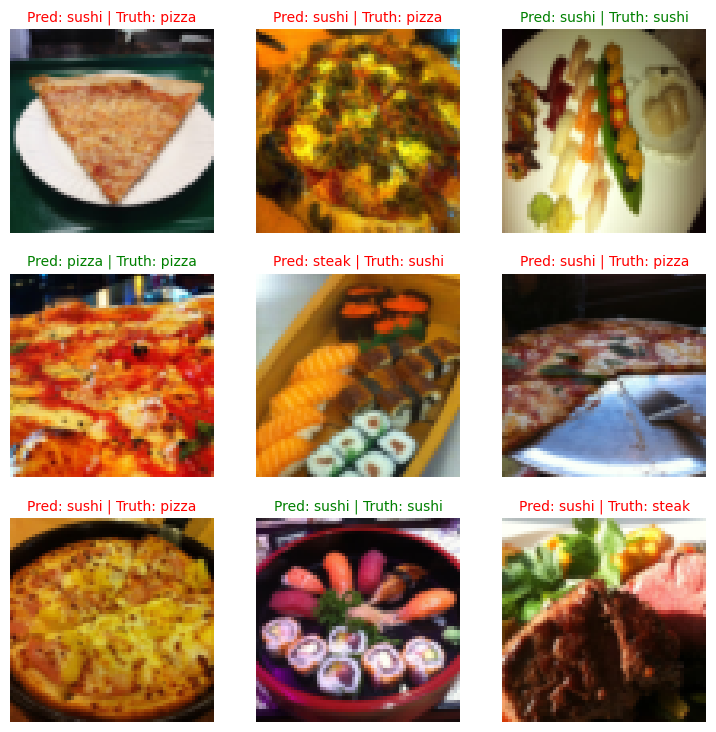

In [ ]:
pred_probs =  make_predictions(model=model_1,
                             data = test_samples)
pred_classes = pred_probs.argmax(dim=1)
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)

    # img = Image.open(sample)
    # img = cv2.imread(sample,"Image")


    plt.imshow((sample.squeeze()).permute(1,2,0))

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize = 10,c="g")

    else:
        plt.title(title_text,fontsize=10,c="r")

    plt.axis(False);

In [ ]:
try:
    import torchinfo
except:
    !pip install -q torchinfo
    import torchinfo

from torchinfo import summary
summary(model_2,input_size = [1,3,224,224])

Layer (type:depth-idx)                   Output Shape              Param #
FoodVision02                             [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 10, 224, 224]         280
│    └─ReLU: 2-2                         [1, 10, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 10, 224, 224]         910
│    └─ReLU: 2-4                         [1, 10, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 10, 112, 112]         --
├─Sequential: 1-2                        [1, 10, 56, 56]           --
│    └─Conv2d: 2-6                       [1, 10, 112, 112]         910
│    └─ReLU: 2-7                         [1, 10, 112, 112]         --
│    └─Conv2d: 2-8                       [1, 10, 112, 112]         910
│    └─ReLU: 2-9                         [1, 10, 112, 112]         --
│    └─MaxPool2d: 2-10                   [1, 10, 56, 56]           --
├─Sequentia

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features, dropout_rate=0.1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return x

class VisionTransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_hidden_dim, dropout_rate=0.1):
        super(VisionTransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout_rate)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_hidden_dim, embed_dim, dropout_rate)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        attention_output, _ = self.attention(x, x, x)
        x = x + self.dropout(attention_output)
        x = self.norm1(x)

        mlp_output = self.mlp(x)
        x = x + self.dropout(mlp_output)
        x = self.norm2(x)

        return x

class VisionTransformer(nn.Module):
    def __init__(self, image_size, patch_size, num_classes, embed_dim, num_heads, num_layers, mlp_hidden_dim, dropout_rate=0.1):
        super(VisionTransformer, self).__init__()
        assert image_size % patch_size == 0, "Image dimensions must be divisible by the patch size"
        num_patches = (image_size // patch_size) ** 2
        patch_dim = 3 * patch_size ** 2  # Assuming RGB images

        self.patch_embed = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.positional_embedding = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim))
        self.dropout = nn.Dropout(dropout_rate)

        self.blocks = nn.ModuleList([
            VisionTransformerBlock(embed_dim, num_heads, mlp_hidden_dim, dropout_rate)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.fc_head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = x.flatten(2).transpose(1, 2)
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.positional_embedding
        x = self.dropout(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        cls_token_final = x[:, 0, :]
        output = self.fc_head(cls_token_final)
        return output

# Example usage:
image_size = 224
patch_size = 16
num_classes = len(class_names)
embed_dim = 768
num_heads = 12
num_layers = 12
mlp_hidden_dim = 3072
dropout_rate = 0.1

device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = VisionTransformer(image_size, patch_size, num_classes, embed_dim, num_heads, num_layers, mlp_hidden_dim, dropout_rate).to(device)


In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

train_time_start_on_gpu = timer()
epochs = 22
start_time = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    train_step(model=model_3,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
    test_step(model=model_3,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

    end_time = timer()
    print_train_time(start_time,end_time,device)

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.17214 | Train Accuracy: 29.688
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 8.924 seconds
Epoch: 1
-----
Train Loss: 1.16574 | Train Accuracy: 29.688
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 17.647 seconds
Epoch: 2
-----
Train Loss: 1.13724 | Train Accuracy: 31.250
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 25.989 seconds
Epoch: 3
-----
Train Loss: 1.11758 | Train Accuracy: 28.906
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 34.170 seconds
Epoch: 4
-----
Train Loss: 1.12848 | Train Accuracy: 42.578
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 42.230 seconds
Epoch: 5
-----
Train Loss: 1.07245 | Train Accuracy: 44.141
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 50.230 seconds
Epoch: 6
-----
Train Loss: 1.06327 | Train Accuracy: 40.625
Test Loss: 1.11779 | Test Accuracy 26.042

Train time on cuda: 58.262 seconds
Epoch: 7
-----
Train Loss: 1.14681 

In [ ]:
eval_model(model_3,test_dataloader,loss_fn,accuracy_fn,device)

  0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'VisionTransformer',
 'model_loss': 1.1177897453308105,
 'model_acc': 26.041666666666668}

In [ ]:
def make_predictions(model: torch.nn.Module,
                    data:list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction Probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get prob_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)



In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(test_samples[0].shape)



torch.Size([3, 224, 224])


In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_3.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        X,y = X.to(device),y.to(device)

        y_logits = model_3(X)

        y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/3 [00:00<?, ?it/s]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

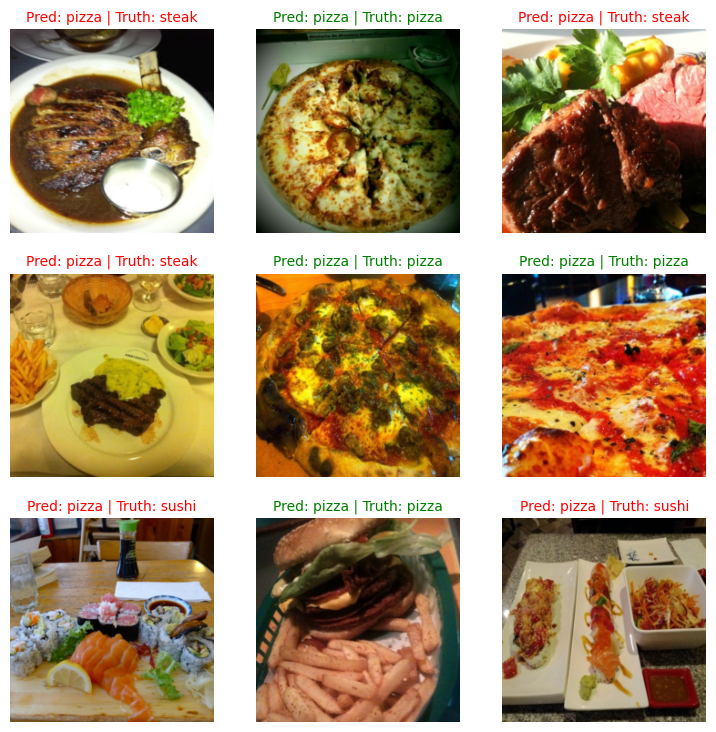

In [ ]:
pred_probs =  make_predictions(model=model_3,
                             data = test_samples)
pred_classes = pred_probs.argmax(dim=1)
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)

    # img = Image.open(sample)
    # img = cv2.imread(sample,"Image")


    plt.imshow((sample.squeeze()).permute(1,2,0))

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text,fontsize = 10,c="g")

    else:
        plt.title(title_text,fontsize=10,c="r")

    plt.axis(False);

In [ ]:
y_pred = y_pred_tensor.unsqueeze(dim=1).numpy()
y_pred.reshape(-1)
# y_pred.shape
test_data = torch.Tensor(test_data.targets)
test_data[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

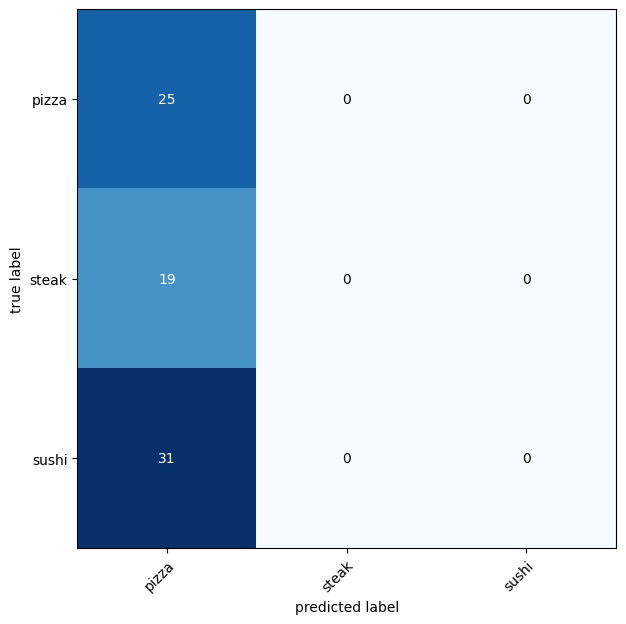

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cofmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
cofmat_tensor = cofmat(preds=y_pred_tensor,
                      target=test_data)

fig,ax = plot_confusion_matrix(conf_mat=cofmat_tensor.numpy(),
                              class_names=class_names,
                              figsize=(10,7))

In [ ]:
summary(model_3,input_size = [1,3,224,224])

Layer (type:depth-idx)                   Output Shape              Param #
VisionTransformer                        [1, 3]                    152,064
├─Conv2d: 1-1                            [1, 768, 14, 14]          590,592
├─Dropout: 1-2                           [1, 197, 768]             --
├─ModuleList: 1-3                        --                        --
│    └─VisionTransformerBlock: 2-1       [1, 197, 768]             --
│    │    └─MultiheadAttention: 3-1      [1, 197, 768]             2,362,368
│    │    └─Dropout: 3-2                 [1, 197, 768]             --
│    │    └─LayerNorm: 3-3               [1, 197, 768]             1,536
│    │    └─MLP: 3-4                     [1, 197, 768]             4,722,432
│    │    └─Dropout: 3-5                 [1, 197, 768]             --
│    │    └─LayerNorm: 3-6               [1, 197, 768]             1,536
│    └─VisionTransformerBlock: 2-2       [1, 197, 768]             --
│    │    └─MultiheadAttention: 3-7      [1, 197, 768] 

In [ ]:
# Early stopping parameters
patience = 3
best_val_loss = float('inf')
counter = 0
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for batch_data in dataloader:
        # Forward pass, backward pass, and optimization steps here
        # ...

    # Validation step
    # val_loss = ...

    # Check for improvement in validation loss
    if val_loss < best_val_loss:
        # Save the current best model
        torch.save(vit_model.state_dict(), 'best_model_vit.pth')
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1

    # Check for early stopping
    if counter >= patience:
        print(f'Early stopping after {epoch} epochs.')
        break

# Load the best model
vit_model.load_state_dict(torch.load('best_model_vit.pth'))
